# Lecture 19

## Joint, Conditional and Marginal Distributions; 2D LOTUS; Expected Distance between Uniforms; Chicken-egg Problem

### Joint, Conditional and Marginal Distributions

#### Joint CDF
A joint CDF is simply where we are dealing with multiple random variables. As an example, a case where we have two random variables $X, Y$, the joint CDF of two random variables $X, Y$ can be expressed as:

\begin{align}
  F(x,y) &= P(X {\le} x, Y {\le} y)
\end{align}

Note that the random variables may be discrete, continuous, or a mixture of both.

#### Joint PDF
The joint PDF, in the case of _continuous_ random variables, is what you would _integrate_ to get the joint CDF. Continuing with our example of two (continous) random variables, we have:

\begin{align}
  f(x,y) &= \frac{\partial^2}{\partial{x}\partial{y}} F(x,y)
\end{align}

Conversely, if we want to know the probability of $X,Y$ in some set $A$, we _integrate_ the density to get that probability.

\begin{align}
  P\left((X,Y) \in A\right) &= \iint\limits_{A} f(x,y) \, dxdy
\end{align}

Integrate by holding one variable constant, and then do the other. The key thing is to be sure to get the _limits of integration_ correct.

#### Marginal PDF
The _marginal PDF of $X$_ is obtained by _integrating out the $Y$_. Recall the $X,Y$ contigency table and the definition of marginal probability.

\begin{align}
  \int_{-\infty}^{\infty} f(x,y) \, dy
\end{align}

Notice that by keeping $X$ constant and _integrating over all $Y$_, the marginal PDF of $X$ no longer depends on $Y$.

And we can do vice-versa for the marginal PDF of $Y$, but keeping $Y$ constant and _integrating over all $X$_.

Do not forget that taking the marginal PDF of $X$ and then integrating over all $X$, we should get 1.0.

\begin{align}
  \int\limits_{-\infty}^{\infty} \int\limits_{-\infty}^{\infty} f(x,y) \, dx dy &= 1.0
\end{align}

#### Conditional PDF

Given that we know $X$, what is the appropriate PDF for $Y$?

Well, we can apply what we know about _conditional probability_ to get a conditional PDF.

\begin{align}
  f_{Y|X} (y|x) &= \frac{f_{XY}(x,y)}{f_{X}(x)} \\
    &= \frac{f_{X|Y}(x|y) \, f_{Y}(y)}{f_{X}(x)}
\end{align}

This is completely analogous to conditional probability. 

#### Independence

$X,Y$ are independent if

\begin{align}
  f_{X,Y}(x,y) &= f_{X}(x) \, f_{Y}(y) &\quad \text{for all }x, y \text{ from PDF p.o.v.} \\
  \\
  F(x,y) &= F(x) \, F(y) &\quad \text{for all }x, y \text{ from CDF p.o.v.} 
\end{align}

These statements are equivalent, but in most cases it might be easier to work the PDFs.

----

### A Uniform example

Let's revisit that distribution that is uniform on the unit disc $x^2 + y^2 \le 1$.

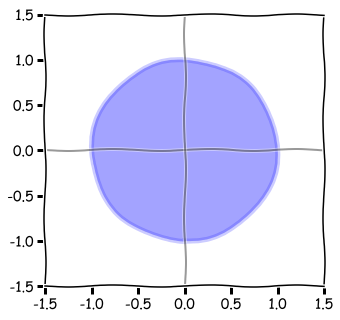

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

plt.xkcd()

fig = plt.figure(figsize = (5.0,5.0))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1.5,1.5])
circ = plt.Circle((0, 0), radius=1.0, color="b", alpha=0.2, lw=5)
ax.add_patch(circ)
plt.axhline(0, color="black", alpha=0.4)
plt.axvline(0, color="black", alpha=0.4)
plt.show()

#### Joint PDF

A valid PDF is required to integrate to 1.0, and since we are looking at a Uniform distribution over the unit circle with area equal to $\pi$,  we have

\begin{align}
  f_{XY}(x,y) &= 
    \begin{cases}
      \frac{1}{\pi}  & \quad \text{if } x^2 + y^2 \le 1 \\
      0  & \quad \text{otherwise}\\
    \end{cases}
\end{align}

Understand that while this is uniformly distributed, $x$ and $y$ are closely related with $x^2 + y^2 \le 1$, and so $X,Y$ cannot be independent. More on that coming up.

#### Marginal PDF of $X$

\begin{align}
  f_{X}(x) &= \int_{-\sqrt{1-x^2}}^{\sqrt{1-x^2}} \frac{1}{\pi} dy \\
  \\
  &= \frac{2}{\pi} \sqrt{1-x^2} &\quad \text{where } -1 \le x \le 1
\end{align}

Notice that while the joint PDF is Uniform, the marginal PDF is not Uniform: it grows as $x$ approaches 0. 

By _symmetry_ we can just replace $x$ with $y$ to get the marginal PDF of $Y$ $f_{Y}(y)$

#### Conditional PDF of $Y|X$

\begin{align}
  f_{Y|X}(y|x) &= \frac{f_{XY}(x,y)}{f_{X}(x)} \\
  &= \frac{\frac{1}{\pi}}{\frac{2}{\pi} \sqrt{1-x^2}} \\
  &= \frac{1}{2 \sqrt{1-x^2}} &\quad \text{if } -\sqrt{1-x^2} \le y \le \sqrt{1-x^2}
\end{align}

But since we are treating $x$ as a constant, and the above equation does not _depend on $y$_, the conditional PDF $f_{Y|X}(y|x)$ is actually Uniform.

\begin{align}
  Y|X &\sim Unif(-\sqrt{1-x^2}, \sqrt{1-x^2}) &\quad \text{or also } \\
  \\
  Y|X=x \, &\sim Unif(-\sqrt{1-x^2}, \sqrt{1-x^2})
\end{align}

#### Non-independence

Since in our example above

\begin{align}
  f_{XY}(x,y) \neq f_{X}(x) \, f_{Y}(y)
\end{align}

we can see that $X,Y$ are not independent.

Or, because the _unconditional_ distribution of $Y$ is not the same as the _conditional_ distribution of $Y|X$, it necessarily follows that $X,Y$ are not independent as learning $X$ gives us information about $Y$ (and vice-versa).


----

### 2D LOTUS

Let $X,Y$ have joint PDF $f(x,y)$, and let $g(x,y)$ be a real-valued function of $x,y$.

Then, without trying to find the PDF of $g(x,y)$, LOTUS lets us use joint PDF:

\begin{align}
  \mathbb{E} g(x,y) &= \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} g(x,y) \, f(x,y) \, dx dy
\end{align}

We will illustrate this by proving the following theorem.

#### Theorem
If $X,Y$ are independent, then $\mathbb{E}(XY) = \mathbb{E}(X)\mathbb{E}(Y)$.

Or, in other words, the _independence_ of r.v. $X$ and $Y$ implies that they are _uncorrelated_.

#### Proof

Consider the continuous case

\begin{align}
  \mathbb{E}(XY) &= \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} xy \, f(x,y) \, dx dy &\quad \text{2D LOTUS} \\
  &= \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} xy \, f_{X}(x) \, f_{Y}(y) \, dx dy &\quad \text{since } X,Y \text{ are independent} \\
  &= \int_{-\infty}^{\infty} \left( \int_{-\infty}^{\infty} xy \, f_{X}(x) \, f_{Y}(y) \, dx \right) dy &\quad \text{this is a double integral, so we can group thusly} \\
  &= \int_{-\infty}^{\infty} y \, f_{Y}(y) \underbrace{ \left( \int_{-\infty}^{\infty} x \, f_{X}(x) \, dx \right)}_{\text{actually }\mathbb{E}(X) \text{, which is constant}} dy &\quad \text{since we are holding } y \text{ constant} \\
  &= \mathbb{E}(X)  \int_{-\infty}^{\infty} y \, f_{Y}(y) \, dy \\
  &= \mathbb{E}(X) \, \mathbb{E}(Y) &\quad \blacksquare
\end{align}

----

### Example: expected distance between 2 Uniformly distributed random points

Given _i.i.d._ $X,Y \sim Unif(0,1)$, find the expected distance between $X$ and $Y$, $\mathbb{E}|X-Y|$.

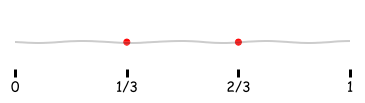

In [2]:
plt.xkcd()


fig,ax = plt.subplots(1, figsize=(6.0,1.0))

plt.plot([1/3, 2/3],[0,0], 'ro')
ax.axhline(y=0, color='k', alpha=0.2)

ax.set_xticks([0.0, (1.0/3.0), (2.0/3.0), 1.0])
ax.set_xticklabels(['0', '1/3', '2/3', '1'])

ax.get_xaxis().set_ticks_position('bottom')
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

We don't need to directly find the distribution of $|X-Y|$, because we are only interested in the _average distance between points $x,y$_. Using LOTUS, we have:

\begin{align}
  \mathbb{E}|X-Y| &= \int_{0}^{1} \int_{0}^{1} |x-y| \, dx dy &\quad \text{since }X,Y \text{ are i.i.d., the joint PDF }=1 \\
  &= \iint_\limits{x \gt y} (x-y) \, dx dy + \iint_\limits{x \le y} (y-x) \, dx dy &\quad \text{split into 2 integrals to deal with abs. value} \\
  &= 2 \int_{0}^{1} \int_{y}^{1} (x-y) \, dx dy  &\quad \text{by symmetry; and since } x \gt y \text{, inner integral starts from }y \\
  &= 2 \int_{0}^{1} \left( \frac{x^2}{2} - yx \right) \bigg|_{y}^{1} \, dy \\
  &= 2 \int_{0}^{1} \frac{1}{2} - y + \frac{y^2}{2} \, dy \\
  &= 2 \left( \frac{1}{6} \right) \\
  &= \boxed{ \frac{1}{3} }
\end{align}

----

But looking at that line-segment illustration above suggest another way of looking at this problem.

Let $M = max(X,Y)$

Let $L = min(X,Y)$

And so

\begin{align}
  |X-Y| &= M - L \\
  \\ 
  \mathbb{E}(M-L) &= \frac{1}{3} &\quad \text{from our previous proof} \\
  \mathbb{E}(M) - \mathbb{E}(L) &= \frac{1}{3} &\quad \text{since } X,Y \text{ are i.i.d.} \\
  \\
  \mathbb{E}(M+L)&= \mathbb{E}(M) + \mathbb{E}(L) &\quad \text{by linearity} \\
  &= \frac{1}{2} + \frac{1}{2} &\quad \text{since} X \sim Unif(0,1) \text{, } Y \sim Unif(0,1) \\
  &= 1 \\
  \\
  \mathbb{E}(M) &= \frac{2}{3} \\
  \mathbb{E}(L) &= \frac{1}{3} 
\end{align}

----

### Chicken-egg Problem

Say we have $N$ eggs; let $N \sim Pois(\lambda)$

Some of the eggs hatch, while some don't. Each egg hatches with probability $p$. The event of an egg hatching is independent of the others.

Let $X$ be the number of eggs out of $N$ that do hatch, so $X|N \sim Bin(N,p)$.

Let $Y$ be the number of eggs that don't hatch, so $X+Y = N$.

Find the joint PMF of $X,Y$. Are they independent?

\begin{align}
  P(X{=}i, Y{=}j) &= \sum_{n=0}^{\infty} P(X{=}i, Y{=}j |N{=}n) \, P(N{=}n) \\
  \\
  &=  P(X{=}i, Y{=}j |N{=i+j}) \, P(N{=i+j})　&\quad \text{since we know that } i + j = n \\
  \\
  &=  P(X{=}i | N{=i+j}) \, P(N{=i+j})　&\quad Y{=}j \text{ is redundant} \\
  \\
  &= \binom{i+j}{i} p^i \, q^j \cdot \frac{e^{-\lambda} \lambda^{i+j}}{(i+j)!} &\quad \text{from definition of binomial and Poisson} \\
  \\
  &=  \frac{(i+j)!}{i! \, j!} p^i \, q^j \cdot \frac{e^{-\lambda} \lambda^{i+j}}{(i+j)!} \\
  \\
  &= \frac{(\lambda p)^i}{i!} \, \frac{(\lambda q)^j}{j!} \, e^{-\lambda} \\
  \\
  &= \left(e^{-\lambda p} \frac{(\lambda p)^i}{i!} \right) \left(e^{-\lambda q}  \frac{(\lambda q)^j}{j!} \right) &\quad \text{since } p + q = 1 \\
  \\
  &\Rightarrow X,Y \text{ are independent, } X \sim Pois(\lambda p), Y \sim Pois(\lambda q)
\end{align}

----